In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/content/HepatitisCdata.csv")
data.head(4)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [4]:
data.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [5]:
data.shape

(615, 14)

In [6]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
data.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [12]:
data.Category.value_counts()

0=Blood Donor             526
3=Cirrhosis                24
1=Hepatitis                20
2=Fibrosis                 12
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [13]:
fig = px.bar(
    data.Category.value_counts(),
    color_discrete_sequence=['darkblue'],
    title='Distribution of Category column',
)
fig.update_layout(
    xaxis_title = "Category",
    yaxis_title = "Frequency",
    title_x = 0.5,
    showlegend = False
)
fig.show()

In [17]:
age_count = data.Age.value_counts()

In [18]:
fig = px.bar(age_count, title="Age of respondents")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5,
    showlegend = False
)
fig.show()

In [19]:
data.Sex.value_counts()

m    363
f    226
Name: Sex, dtype: int64

In [21]:
px.pie(data,names='Sex',title='Gender Overview',hole=0.8)

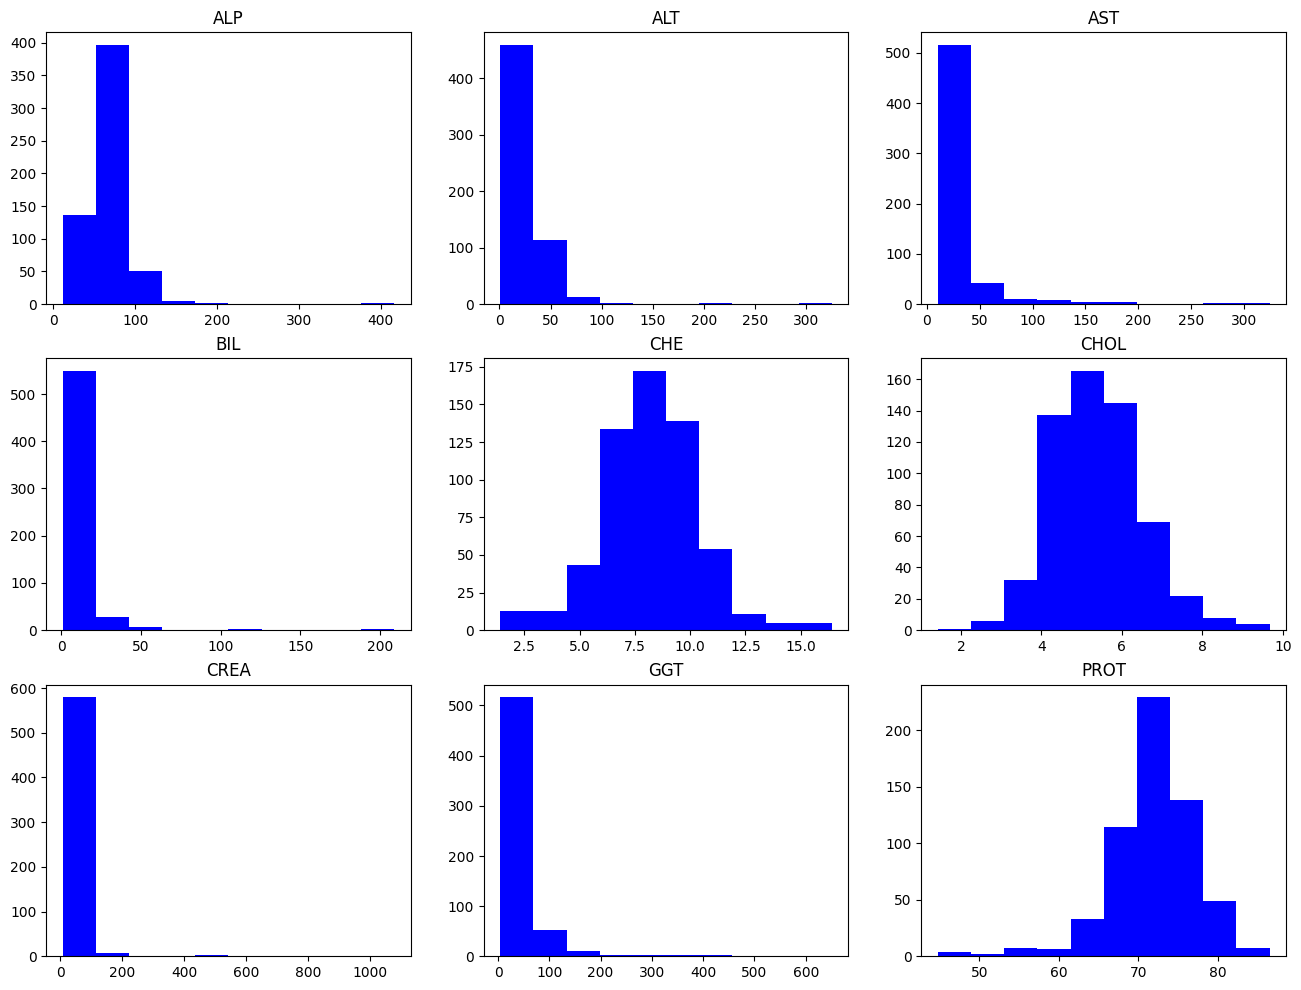

In [23]:
plt.figure(figsize=(16,12))
col_list = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
            'CHOL', 'CREA', 'GGT', 'PROT'
           ]
for i in range(1,len(col_list)):
    plt.subplot(3,3,i)
    plt.hist(data[col_list[i]],color='b',bins=10);
    plt.title(col_list[i])

In [24]:
data.head(4)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7


In [27]:
data.Category = data.Category.apply(lambda x : x.split('=')[0])

In [28]:
def helper(x):
    if x == '0s':
        return '4'
    return x


data.Category = data.Category.apply(helper)

In [29]:
data.Category = data.Category.astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 612
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  589 non-null    int64  
 1   Age       589 non-null    int64  
 2   Sex       589 non-null    object 
 3   ALB       589 non-null    float64
 4   ALP       589 non-null    float64
 5   ALT       589 non-null    float64
 6   AST       589 non-null    float64
 7   BIL       589 non-null    float64
 8   CHE       589 non-null    float64
 9   CHOL      589 non-null    float64
 10  CREA      589 non-null    float64
 11  GGT       589 non-null    float64
 12  PROT      589 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 64.4+ KB


In [30]:
def encode_gender(gender):
    if gender == 'm':
        return 0
    return 1
data.Sex = data.Sex.apply(encode_gender)
data['Sex']

0      0
1      0
2      0
3      0
4      0
      ..
608    1
609    1
610    1
611    1
612    1
Name: Sex, Length: 589, dtype: int64

In [31]:
X = data.drop('Category' , axis = 1)
y = data.Category

In [32]:
X

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
608,58,1,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,59,1,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [33]:
y

0      0
1      0
2      0
3      0
4      0
      ..
608    3
609    3
610    3
611    3
612    3
Name: Category, Length: 589, dtype: int64

In [34]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_smote,y_smote = smk.fit_resample(X,y)
print(f'Before oversampling :{X.shape}')
print(f'After oversampling :{X_smote.shape}')

Before oversampling :(589, 12)
After oversampling :(2630, 12)


In [35]:
y_smote.value_counts()

0    526
4    526
1    526
2    526
3    526
Name: Category, dtype: int64

In [36]:
X_smote

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,0,38.500000,52.500000,7.700000,22.100000,7.500000,6.930000,3.230000,106.000000,12.100000,69.000000
1,32,0,38.500000,70.300000,18.000000,24.700000,3.900000,11.170000,4.800000,74.000000,15.600000,76.500000
2,32,0,46.900000,74.700000,36.200000,52.600000,6.100000,8.840000,5.200000,86.000000,33.200000,79.300000
3,32,0,43.200000,52.000000,30.600000,22.600000,18.900000,7.330000,4.740000,80.000000,33.800000,75.700000
4,32,0,39.200000,74.100000,32.600000,24.800000,9.600000,9.150000,4.320000,76.000000,29.900000,68.700000
...,...,...,...,...,...,...,...,...,...,...,...,...
2625,49,0,31.080085,113.892726,93.233109,53.627816,3.768824,6.574186,6.030788,41.967144,79.854778,56.214848
2626,64,0,21.968735,95.935081,32.377086,36.216231,5.409785,4.376730,3.937303,43.656326,169.217433,47.800000
2627,70,0,15.030135,69.263920,19.501883,93.556797,9.656268,13.114508,2.617769,10.068276,8.207946,46.957269
2628,56,0,44.168988,102.501770,190.526097,127.179079,1.669726,14.655046,7.551400,69.525375,65.415284,75.275287


In [37]:
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=42)

In [38]:
X_smote.shape , X_train.shape , X_test.shape

((2630, 12), (2104, 12), (526, 12))

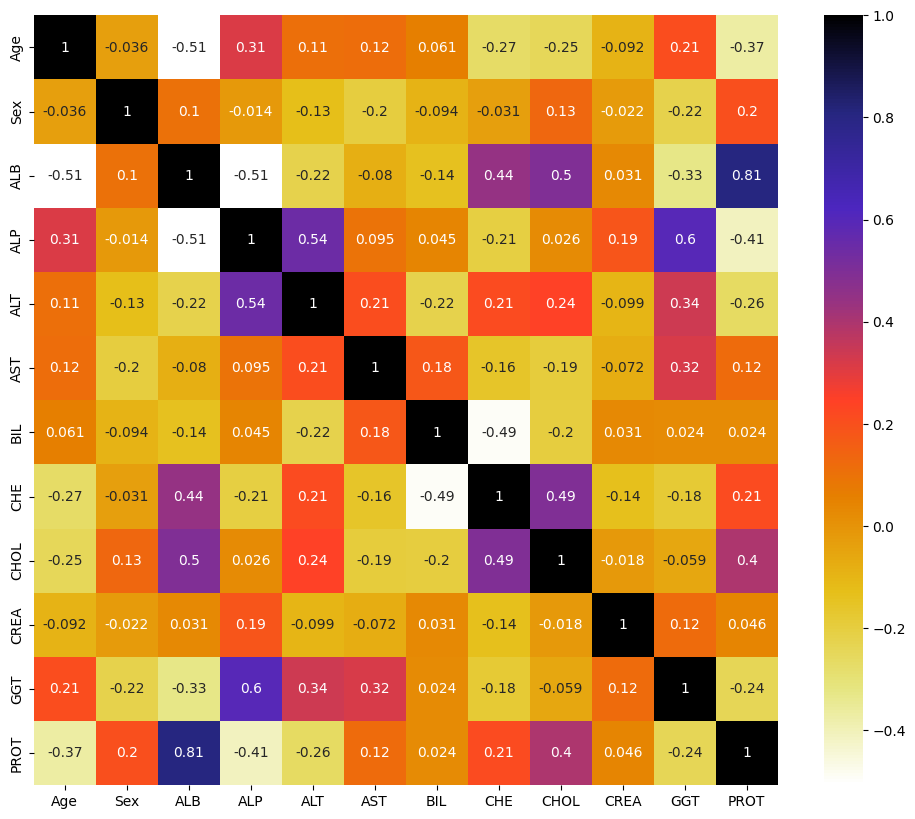

In [39]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [40]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [41]:
corr_features = correlation(X_train,0.8)
corr_features

{'PROT'}

In [42]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [43]:
const_cols = [column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]
const_cols

[]

In [44]:
X_train.drop('PROT',axis=1,inplace=True)
X_test.drop('PROT',axis=1,inplace=True)

In [45]:
models = {
    'modelName':[],
    'modelAccuracy':[]
}

In [46]:
logReg = LogisticRegression()
models['modelName'].append('Logistic Regression')
logReg.fit(X_train,y_train)
models['modelAccuracy'].append(logReg.score(X_test,y_test)*100)

In [47]:
y_pred = logReg.predict(X_test)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       110
           1       0.83      0.77      0.80       109
           2       0.78      0.83      0.81        95
           3       0.97      0.99      0.98       108
           4       0.97      1.00      0.99       104

    accuracy                           0.91       526
   macro avg       0.91      0.91      0.91       526
weighted avg       0.91      0.91      0.91       526



In [49]:
dt = DecisionTreeClassifier()
models['modelName'].append('Decision Tree')
dt.fit(X_train,y_train)
models['modelAccuracy'].append(dt.score(X_test,y_test)*100)

In [50]:
y_pred = dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       110
           1       0.98      0.98      0.98       109
           2       0.98      1.00      0.99        95
           3       0.96      1.00      0.98       108
           4       1.00      0.99      1.00       104

    accuracy                           0.98       526
   macro avg       0.98      0.98      0.98       526
weighted avg       0.98      0.98      0.98       526



In [51]:
rf = RandomForestClassifier()
models['modelName'].append('Random Forest')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
models['modelAccuracy'].append(rf.score(X_test,y_test)*100)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       110
           1       0.99      1.00      1.00       109
           2       1.00      1.00      1.00        95
           3       0.99      1.00      1.00       108
           4       1.00      1.00      1.00       104

    accuracy                           1.00       526
   macro avg       1.00      1.00      1.00       526
weighted avg       1.00      1.00      1.00       526



In [52]:
model_df = pd.DataFrame(models)

In [53]:
model_df

,modelName,modelAccuracy
0,Logistic Regression,91.254753
1,Decision Tree,98.288973
2,Random Forest,99.619772


In [54]:
fig = px.bar(
    x=model_df.modelName,
    y=model_df.modelAccuracy,
    color_discrete_sequence=['deepskyblue'],
    title='Model and its accuracy',
)
fig.update_layout(
    xaxis_title = "Models",
    yaxis_title = "Accuracy",
    title_x = 0.5,
    showlegend = False
)
fig.show()

Results showed the random forest model was able to predict Hepatitis C with 99% accuracy.